In [27]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists

### 2. Testing, testing, 1, 2, 3...

The fastest way to get up to speed with a code is to run already existing problem setups, i.e.,
test problems. It is also generally a good idea to run test problems to make sure the code
is behaving as expected. Run the following test problems and make plots of the results (see
documentation, the initial condition files are located here: http://www.tapir.caltech.
edu/~phopkins/sims/). If the problem has a given analytic or expected numerical result,
comment on how the code performs. Record how many processors you used for the test.
For each test, make a plot of the gas density versus position at a few different times (see
notes on reading and plotting snapshots below).

a) Sod Shock Tube. See left panels in Fig 10 in Hopkins 2015. Compare against the
expected analytic solution (the predicted solution is available as a text file). Discuss any
features you see in the result.

In [180]:
def plot_snapshot(time, ax, color = '#34657C', timestep = 0.5, label=None):
    snapshot_num = int(time/timestep) 
    path = 'output/{}/snapshot_0{}.hdf5'.format(simulation,  '%02d'%snapshot_num)
    
    if exists(path):
        f = h5py.File(path, 'r')
        x, den = get_simulation_density(f)
        
        ax.scatter(x, den, alpha = 0.5, s=5, color=color)
        
        if label == 'upper right':
            xy=(.95, .95)
            halign = 'right'
        else:
            xy=(.1, .95)
            halign = 'left'
            
        ax.annotate('t={}s'.format(time),xy=xy, xycoords="axes fraction",
            horizontalalignment=halign, verticalalignment='top',
            fontsize=20)
        
        if time == 5:
            ###plot exact solution
            ax.plot(exact['x'], exact['density'], color='k', lw=1., alpha = 0.7, label='Exact Solution')
            ax.legend(loc='lower right')
    else:
        print("invalid snapshot time")
        
def get_simulation_density(f):
    partdata = f['PartType0']
    #for name in partdata:
    #    print(name)
    den = f['PartType0']['Density'][:] # Returns a ndarray
    x = f['PartType0']['Coordinates'][:,0]
    #print( f['PartType0']['Masses'][:]) # Returns a ndarray

    return x, den

In [113]:
simulation = 'shocktube'    #This is MFM

### For Sod Shocktube params:
#TimeBegin                                         0
#TimeMax                                           5
#TimeBetSnapshot                                   0.5

In [114]:
### Sod Shocktube exact solution at t=5
exact = pd.read_csv('output/{}/shocktube_exact.txt'.format(simulation), sep='\s+', comment='#',
                    names=['x', 'density', 'pressure', 'entropy', 'x_velocity'])
                    
#print(exact)

In [115]:
time_interest = [0, 1, 2.5, 5]

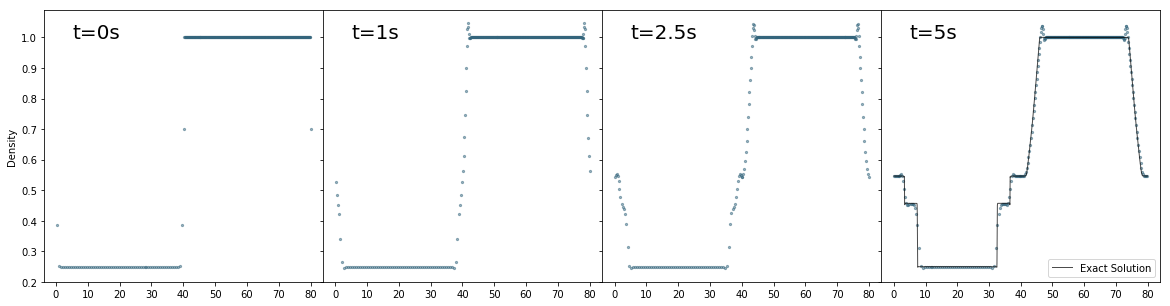

In [116]:
fig, ax = plt.subplots(ncols=len(time_interest), nrows = 1, sharey=True,
                       figsize=(5*len(time_interest),5))
plt.subplots_adjust(wspace=0)

for i in range(len(time_interest)):
    time = time_interest[i]
    plot_snapshot(time, ax[i])
    ax[0].set_ylabel('Density')


One interesting thing you see is the reflection of the shockfront due to the periodic boundary conditon that is not seen in our HW sod shock tube. GIZMO does also seem to have the problem of overshoots between the right state and the rarefaction wave and slightly underpredicts the density between the shock and the left initial state, and is not able to model that discontinuity very well.

Phil provides two different initial configuration files – one in which the cells have fixed mass
and one in which the cells have fixed volume (you can check this for yourself by opening
the ics hdf5 files and inspecting the ’Masses’ and ’Coordinates’ fields). Note that you can
run this problem in either the meshless finite mass (MFM) or meshless finite volume (MFV)
mode (as set in the GIZMO Config.sh file). GIZMO MFM will run the fixed-volume ics file
.... but it doesn’t look as nice.

b) Optional: MFM vs. MFV. Run the Sod shock tube in both MFM and MFV modes
and compare the two solutions. Which do you think is better and why, i.e., how do the
artifacts in the solution differ?

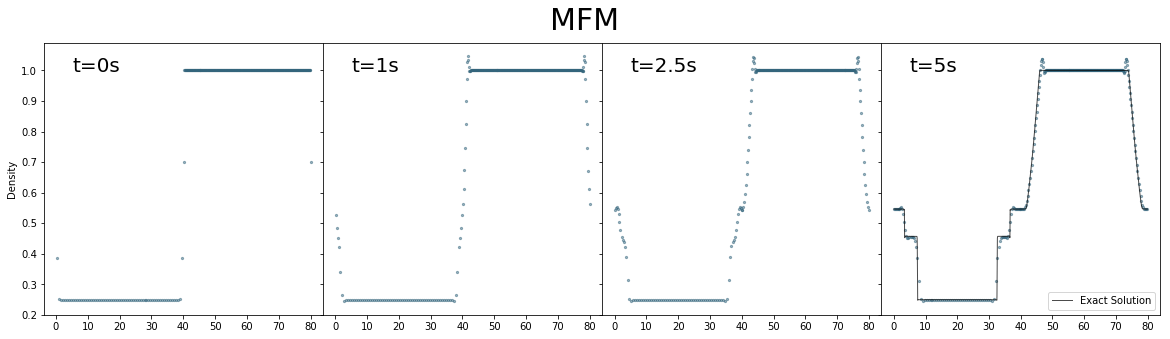

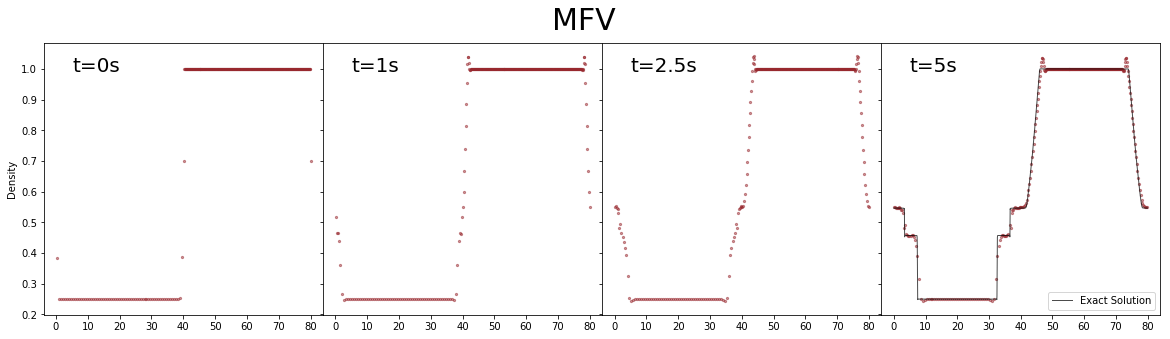

In [118]:
simulation = 'shocktube'   

fig, ax = plt.subplots(ncols=len(time_interest), nrows = 1, sharey=True,
                       figsize=(5*len(time_interest),5))
plt.subplots_adjust(wspace=0)
fig.suptitle('MFM', fontsize = 30)

for i in range(len(time_interest)):
    time = time_interest[i]
    plot_snapshot(time, ax[i])
    ax[0].set_ylabel('Density')

simulation = 'shocktube_MFV'   

fig2, ax = plt.subplots(ncols=len(time_interest), nrows = 1, sharey=True,
                       figsize=(5*len(time_interest),5))
plt.subplots_adjust(wspace=0)
fig2.suptitle('MFV', fontsize = 30)

for i in range(len(time_interest)):
    time = time_interest[i]
    plot_snapshot(time, ax[i], color='#98282E' )
    ax[0].set_ylabel('Density')


MFM seems to perform better for the sod shocktube test case, it is able to model the discontinuity slightly cleaner than the MFV. This might be due to the way the Reimann solver is set up in GIZMO, for the MFM method, GIZMO r equires a solver which explicitly includes the contact wave and solves the problem with the frame moving exactly with to contact discontinuity. Whereas in MFV, there is mass flux within the cells, and so there might be more artifacts at the face of the contact discontinuitiy. 

c) But what about magnetic fields? Choose and run one of the available tests that
includes MHD. Make a plot of the resulting magnetic field, e.g., show either the field in one direction such as ’magnetic field x’ or a proxy for the rms magnetic field ( such as (’gas’,
’magnetic energy’), which is available in yt)

In [165]:
def plot_snapshot_2d(time, ax, color = '#34657C', direction='x'):
    snapshot_num = int(time/0.5) 
    path = 'output/{}/snapshot_0{}.hdf5'.format(simulation,  '%02d'%snapshot_num)
    
    if exists(path):
        f = h5py.File(path, 'r')
        x, y, mf_x, mf_y = get_simulation_density_2d(f)
        
        if direction == 'y':
            mf = mf_y
        else:
            mf = mf_x
            
        ax.hist2d(x, mf, bins=300)
        
        if time>0:
            ax.annotate('t={}s'.format(time),xy=(.1, .95), xycoords="axes fraction",
                horizontalalignment='left', verticalalignment='top', color='white',
                fontsize=20)
        else:
            ax.annotate('t={}s'.format(time),xy=(.1, .95), xycoords="axes fraction",
                horizontalalignment='left', verticalalignment='top',fontsize=20)
            
    else:
        print("invalid snapshot time")
        
def get_simulation_density_2d(f):
    partdata = f['PartType0']
    mf_x = f['PartType0']['MagneticField'][:,0] # Returns a ndarray
    mf_y = f['PartType0']['MagneticField'][:,1] # Returns a ndarray
    x = f['PartType0']['Coordinates'][:,0]
    y = f['PartType0']['Coordinates'][:,1]
    #print( f['PartType0']['Masses'][:]) # Returns a ndarray
    return x, y, mf_x, mf_y

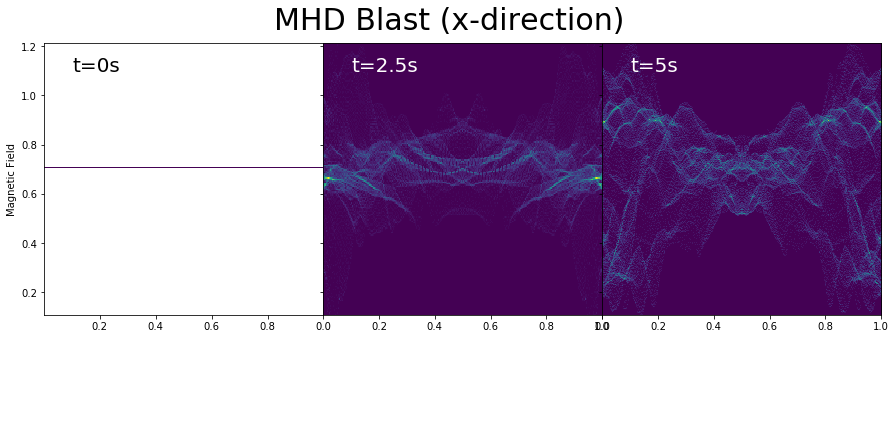

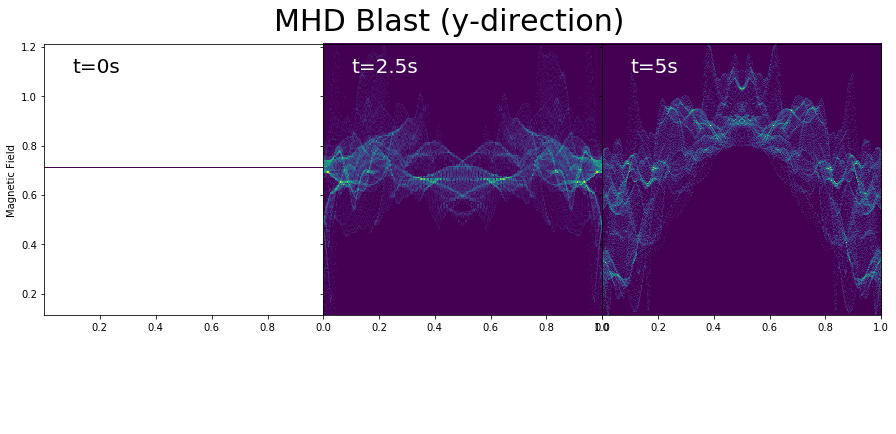

In [168]:
simulation = 'mhd_blast'    #This is MFM

time_interest = [0, 2.5, 5]

fig, ax = plt.subplots(ncols=len(time_interest), nrows = 1, sharey=True,
                       figsize=(5*len(time_interest),5))
plt.subplots_adjust(wspace=0)
fig.suptitle('MHD Blast (x-direction)', fontsize = 30)

for i in range(len(time_interest)):
    time = time_interest[i]
    plot_snapshot_2d(time, ax[i])
    ax[0].set_ylabel(r'Magnetic Field')

fig, ax = plt.subplots(ncols=len(time_interest), nrows = 1, sharey=True,
                       figsize=(5*len(time_interest),5))

plt.subplots_adjust(wspace=0)
fig.suptitle('MHD Blast (y-direction)', fontsize = 30)

for i in range(len(time_interest)):
    time = time_interest[i]
    plot_snapshot_2d(time, ax[i], direction='y')
    ax[0].set_ylabel(r'Magnetic Field')

e) Problems and Comments. Did you encounter any problems? If so, how did you solve
them? Do you have any questions that were not answered by the documentation? 

There was a problem with the modules to be loaded, I had to replace `impi` with `mvapich2` to get GIZMO to compile. I found the correct module to load via the GIZMO documentation. I also found it difficult to modify the `make_ics.py` by GIZMO to make the `ics` file for problem 3 and found it easier to use that as a loose reference and write my own program. Otherwise things went relatively smoothly.

### 3. Sod it! Not again!
Using Make IC.py in the GIZMO scripts directory as a guide (or another of the setup
options) generate initial conditions for the Sod shock tube problem we did in HW2. You
may either use GIZMO’s MFM solver – in which case make the cell mass uniform in your
setup – or the MFV solver — make the cell volume uniform (constant dx spacing).

Text(0.5,1,'Sod Shocktube')

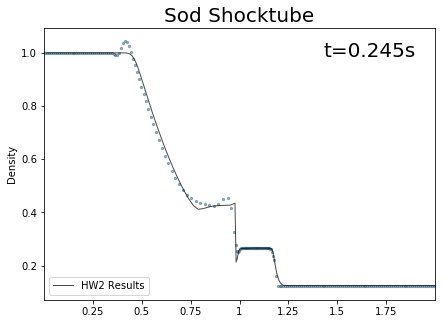

In [210]:
simulation = 'sod_again_MFV'   
time_interest = [0.245]
HW2_results = np.loadtxt('../HW2_sod.txt')

fig, ax = plt.subplots(ncols=1, nrows = 1, sharey=True,
                       figsize=(7,5))
plt.subplots_adjust(wspace=0)


time = time_interest[0]
plot_snapshot(time, ax, timestep = 0.005, label='upper right')

if time == 0.245:
    ax.plot(HW2_results[0,:]+1., HW2_results[1,:], color = 'k', lw=1, label='HW2 Results', alpha=0.7)
    ax.legend(loc='lower left')

### To avoid the periodic boundary condition reflecting a shock front, I ran the problem in a box with L=4
### instead of L=2 and and plotted by HW 2 results shifted by position+1. 

### Here I rename the axis so that the initial contact discontinuity is shown at x=0.75
ax.set_xlim(1, 3)
ax.set_xticks([1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75])
ax.set_xticklabels(['0.25', '0.5','0.75','1','1.25','1.5','1.75'])

ax.set_ylabel('Density') 
ax.set_title('Sod Shocktube', fontsize=20)